Imports and Setup

In [3]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("GLF-smartCans.csv")
df.head()

,_id,container_id,receptacle_model_id,address,zip,neighborhood
0,314722,1,74,122 E North Ave,15212,Central Northside
1,314723,2,74,2507 Brighton Rd,15212,Marshall-Shadeland
2,314724,3,74,1300 Federal St,15212,Central Northside
3,314725,4,74,110 Federal St,15212,Allegheny Center
4,314726,5,74,490 E North Ave,15212,Central Northside


Clearly the best neighborhoods would have the most smart trash cans. Therefore, we need to use a bar chart to see which neighborhoods have the most smart trash cans.

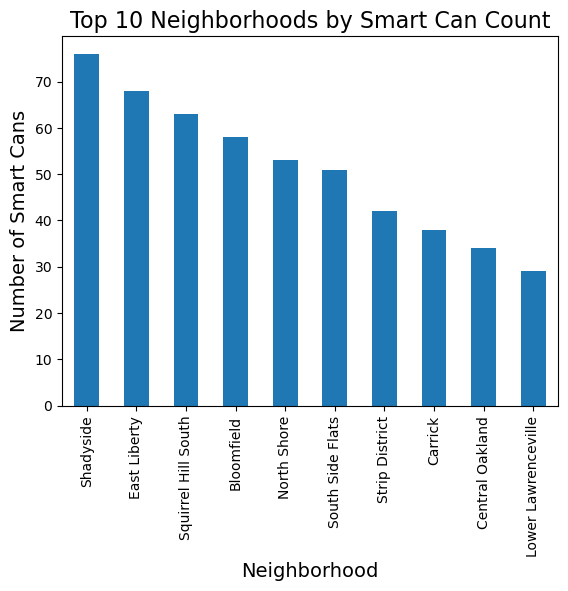

In [4]:
top_10 = df["neighborhood"].value_counts().nlargest(10)
top_10.plot.bar()
plt.title("Top 10 Neighborhoods by Smart Can Count", fontsize=16)
plt.ylabel("Number of Smart Cans", fontsize=14)
plt.xlabel("Neighborhood", fontsize=14)
plt.show()

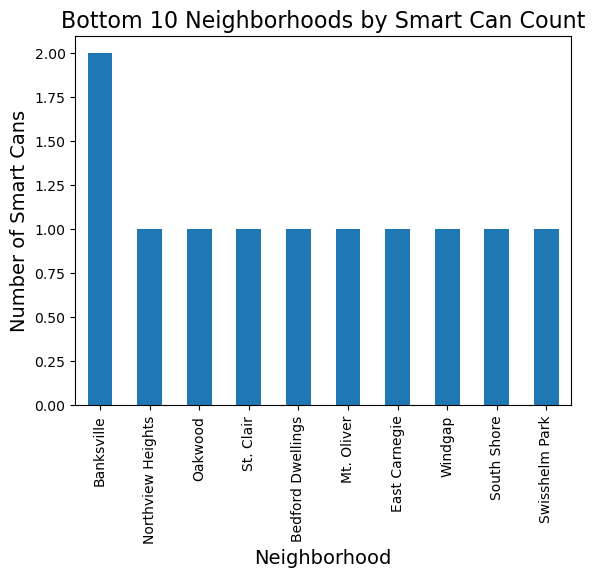

In [5]:
bottom_10 = df["neighborhood"].value_counts().nsmallest(10).sort_values(ascending=False)
bottom_10.plot.bar()
plt.title("Bottom 10 Neighborhoods by Smart Can Count", fontsize=16)
plt.ylabel("Number of Smart Cans", fontsize=14)
plt.xlabel("Neighborhood", fontsize=14)
plt.show()

These charts provide some interesting information. Shadyside, East Liberty, Squirrel Hill South, Bloomfield, and the North Shore have the most smart trash cans. Additionally, there are nine neighborhoods that have only one smart trash can. Those nine should certaily be avoided.

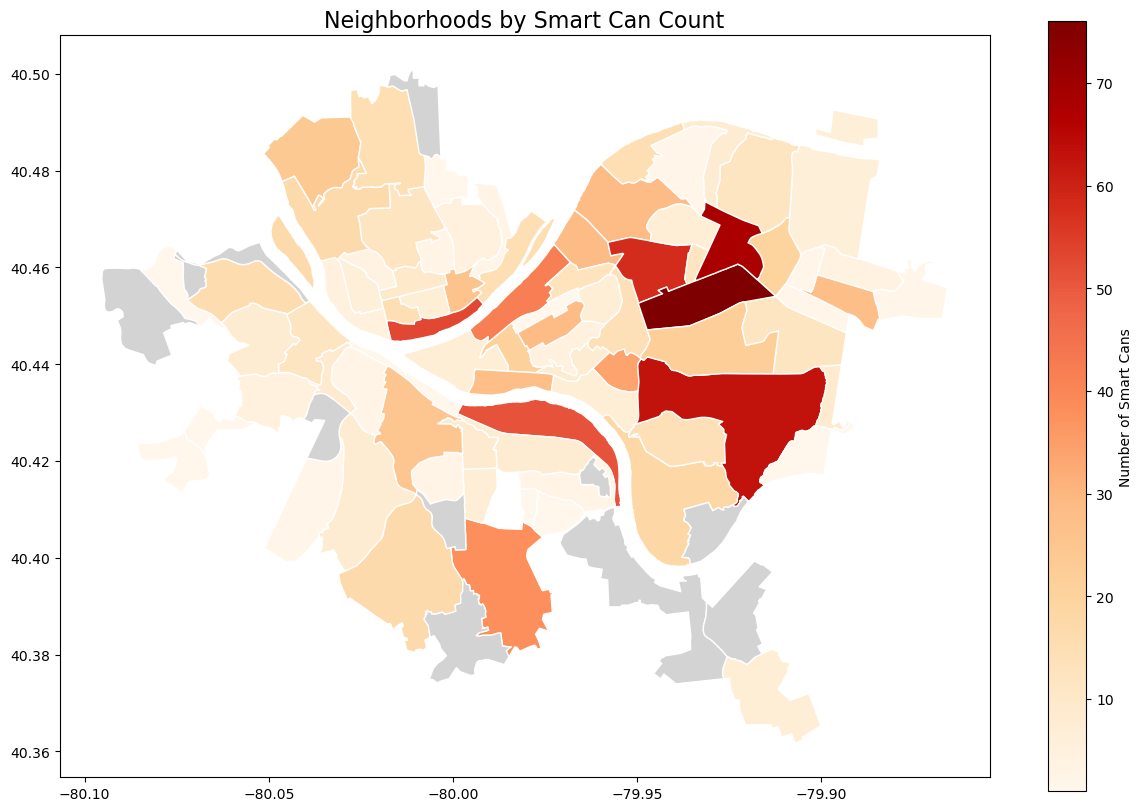

In [6]:
neighborhoods = geopandas.read_file("GLF-Neighborhoods/Neighborhoods_.shp")
smart_cans_count = df.groupby('neighborhood').size().reset_index(name='smart_cans_count')
combo = neighborhoods.merge(smart_cans_count, left_on='hood', right_on='neighborhood', how='left')

combo.plot(column='smart_cans_count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Smart Cans"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.title("Neighborhoods by Smart Can Count", fontsize=16)
plt.show()